## Compare results between different "datasets" -- NAT vs. small CPN vs. big CPN

Questions:
* pupil-dependent...
    * decoding the same?
    * noise correlations the same?
    * first order changes?
* overall pupil variance?
* number of cells?
* mean firing rates?
* MUA / instability?

In [1]:
import sys; sys.path.append("/auto/users/hellerc/code/projects/nat_pupil_ms/")
from global_settings import CPN_SITES, HIGHR_SITES
import charlieTools.nat_sounds_ms.decoding as decoding
import charlieTools.nat_sounds_ms.preprocessing as cpreproc
import load_results as ld
from path_settings import DPRIME_DIR, PY_FIGURES_DIR, PY_FIGURES_DIR2, CACHE_PATH, REGRESSION

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2021-11-09 213440.log


In [2]:
# Define datasets
nat_data = HIGHR_SITES
cpns_data = [s for s in CPN_SITES if 'TNC' not in s]
cpnb_data = [s for s in CPN_SITES if 'TNC' in s]

In [3]:
# LOAD RAW DATA
rdata = {}
batches = [322]*len(nat_data) + [331]*len(CPN_SITES)
for site, batch in zip(nat_data+cpns_data+cpnb_data, batches):
    if site in ['BOL005c', 'BOL006b']:
        b = 294
    else:
        b = batch
    X, sp_bins, X_pup, pup_mask = decoding.load_site(site=site, batch=b)
    max_pupil = decoding.get_max_pupil(site[:7], rasterfs=4)
    rdata[site] = (X, sp_bins, X_pup, pup_mask, max_pupil)


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/294/BOL005c_045fa3fa2325c41a82e01440f3e3128b9e8f5088.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[root INFO] Extracting cellids: ['BOL005c-04-1', 'BOL005c-06-1', 'BOL005c-07-1', 'BOL005c-09-1', 'BOL005c-09-2', 'BOL005c-10-1', 'BOL005c-12-2', 'BOL005c-13-1', 'BOL005c-13-2', 'BOL005c-18-1', 'BOL005c-19-2', 'BOL005c-22-1', 'BOL005c-24-1', 'BOL005c-25-1', 'BOL005c-25-2', 'BOL005c-25-3', 'BOL005c-27-1', 'BOL005c-29-1', 'BOL005c-32-1', 'BOL005c-33-1', 'BOL005c-34-1', 'BOL005c-37-1', 'BOL005c-37-2', 'BOL005c-43-1', 'BOL005c-44-1', 'BOL005c-44-2', 'BOL005c-46-1', 'BOL005c-47-1', 'BOL005c-48-1', 'BOL005c-48-4', 'BOL005c-49-1', 'BOL005c-49-2']
[numexpr.utils INFO] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[numexpr.utils INFO] NumExpr defaulting to 8 threads.
[root INFO] ['/auto/data/daq/Boleto/BOL005/BOL005c05_p_PPS_VOC.m', '/auto/data/daq/Bole

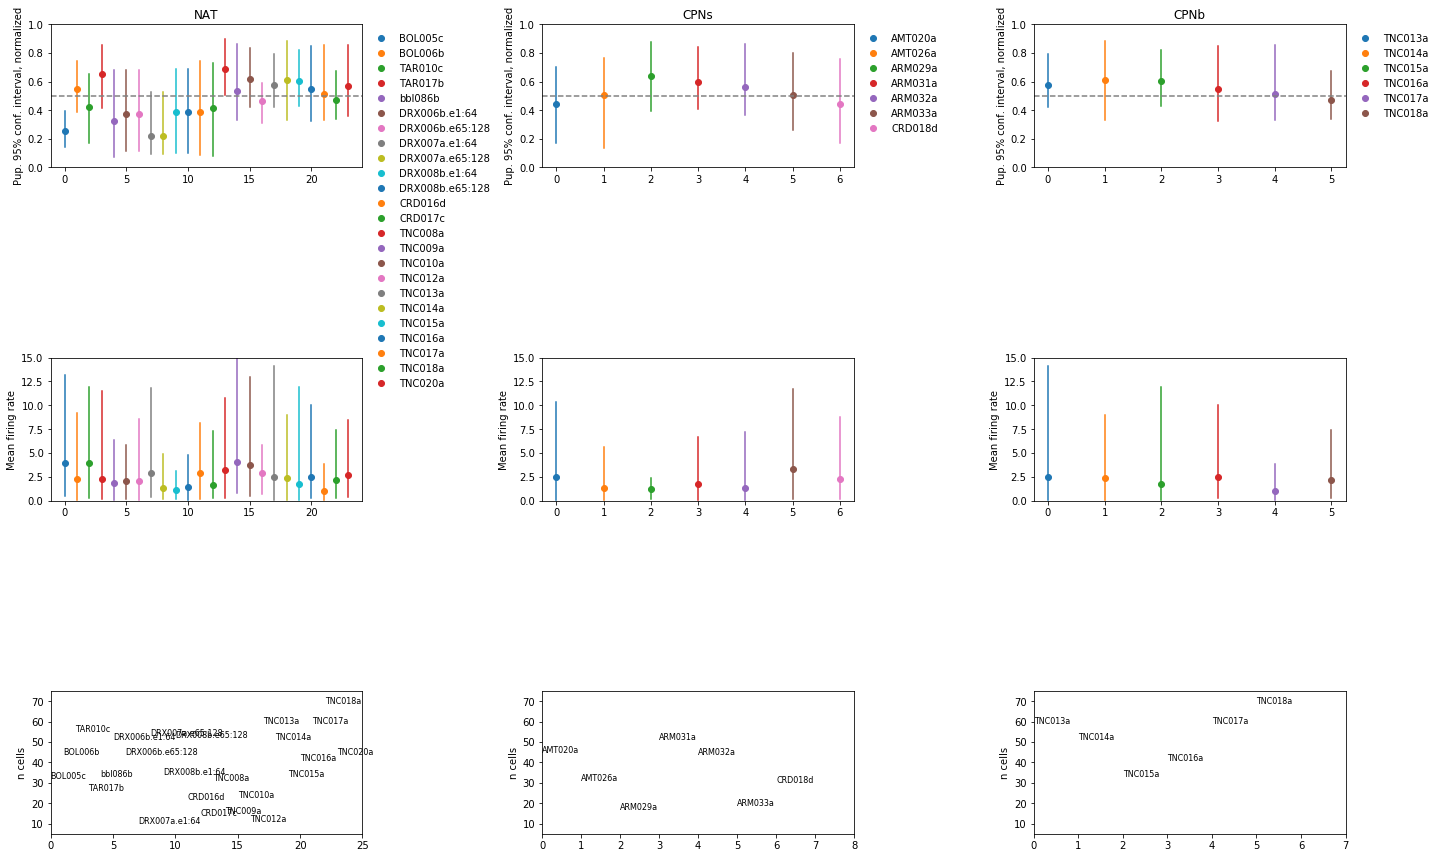

In [4]:
# COMPARE PUPIL VARIANCE, MEAN FIRING RATES, NUMBER OF CELLS
f, ax = plt.subplots(3, 3, figsize=(20, 12))

for i, (sites, dataset) in enumerate(zip([nat_data, cpns_data, cpnb_data], ['NAT', 'CPNs', 'CPNb'])):
#for i, (sites, dataset) in enumerate(zip([nat_data], ['NAT'])):
    for j, s in enumerate(sites):
        # pupil
        p = rdata[s][2][:, :, :, ~rdata[s][1][0, 0, 0, :]].squeeze() # X_pup, keep evoked data
        p /= rdata[s][-1] #p.max()
        ax[0, i].plot(j, p.mean(), 'o', label=s)
        ax[0, i].plot([j, j], [np.quantile(p, 0.025), np.quantile(p, 0.975)], color=ax[0, i].get_lines()[-1].get_color())
        # firing rate
        r = rdata[s][0][:, :, :, ~rdata[s][1][0, 0, 0, :]].squeeze()
        ur = r.mean(axis=(1,2,3))
        ax[1, i].plot(j, ur.mean(), 'o', label=s)
        ax[1, i].plot([j, j], [np.quantile(ur, 0.025), np.quantile(ur, 0.975)], color=ax[1, i].get_lines()[-1].get_color())

        #ax[2, i].plot(j, len(ur), 'o')
        ax[2, i].text(j, len(ur), s, fontsize=8)
    
    ax[0, i].legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
    ax[0, i].set_ylim((0, 1))
    ax[0, i].axhline(0.5, linestyle='--', color='grey')
    ax[0, i].set_title(dataset)
    ax[0, i].set_ylabel("Pup. 95% conf. interval, normalized")

    ax[1, i].set_ylabel("Mean firing rate")
    ax[1, i].set_ylim((0, 15))
    
    ax[2, i].set_ylabel("n cells")
    ax[2, i].set_ylim((5, 75))
    ax[2, i].set_xlim((0, len(sites)+1))

f.tight_layout()

[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL006b/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/TAR010c/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/TAR017b/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/bbl086b/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/DRX006b.e1:64/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/322/DRX006b.e65:128/dprime_jk10_

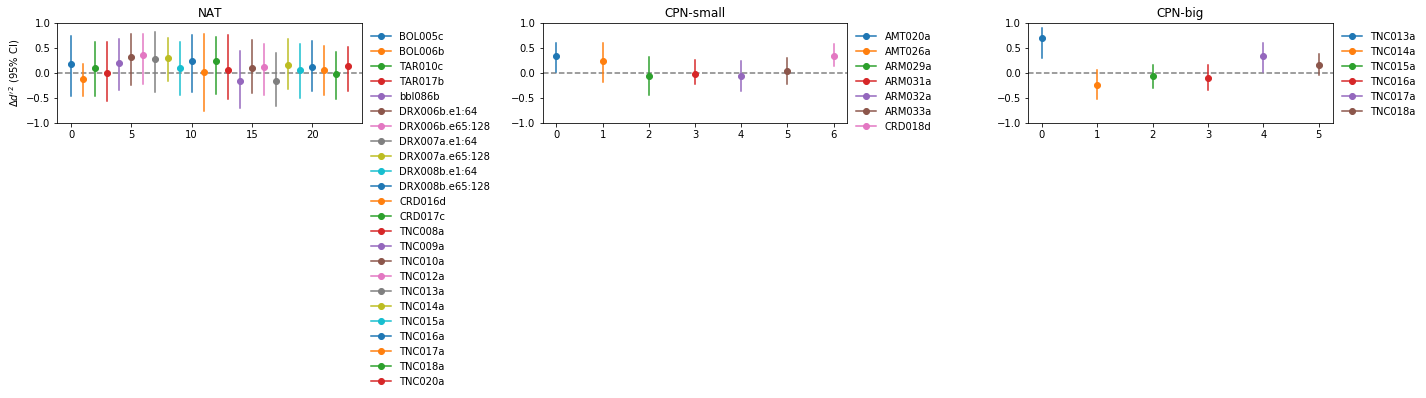

In [5]:
# DECODING EFFECTS PER SITE
f, ax = plt.subplots(1, 3, figsize=(20, 4))

loader = decoding.DecodingResults()
modelname = 'dprime_jk10_zscore_allPup_fixtdr2-fa'
n_components = 2

for i, (dataset, batch, sites) in enumerate(zip(['NAT', 'CPN-small', 'CPN-big'], [322, 331, 331], [nat_data, cpns_data, cpnb_data])):
    for j, site in enumerate(sites):
        if site in ['BOL005c', 'BOL006b']:
            _batch = 294
        else:
            _batch = batch
        fn = os.path.join(DPRIME_DIR, str(_batch), site, modelname+'_TDR.pickle')
        results = loader.load_results(fn)
        df = results.numeric_results; df['delta_dprime'] = (df['bp_dp'] - df['sp_dp']) / (df['bp_dp'] + df['sp_dp']); df['site'] = site; df['batch'] = batch
        ax[i].plot(j, df['delta_dprime'].mean(), marker='o', label=site)
        ax[i].plot([j, j], 
                    [np.quantile(df['delta_dprime'], 0.025), np.quantile(df['delta_dprime'], 0.975)],
                     color=ax[i].get_lines()[-1].get_color())
    ax[i].legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
    ax[i].axhline(0, linestyle='--', color='grey', zorder=-1)
    ax[0].set_ylabel(r"$\Delta d'^2$ (95% CI)")
    ax[i].set_ylim((-1, 1))
    ax[i].set_title(dataset)

f.tight_layout()

In [6]:
# CHANGE IN NOISE CORRELATIONS (mvm mask results not yet run for older data)
rsc = ld.load_noise_correlation('rsc_ev_perstim')
rsc['delta'] = rsc['sp'] - rsc['bp']


no results found for site: AMT021b, model: rsc_ev_perstim
no results found for site: ARM005e, model: rsc_ev_perstim
no results found for site: CRD005b, model: rsc_ev_perstim
no results found for site: CRD019b, model: rsc_ev_perstim


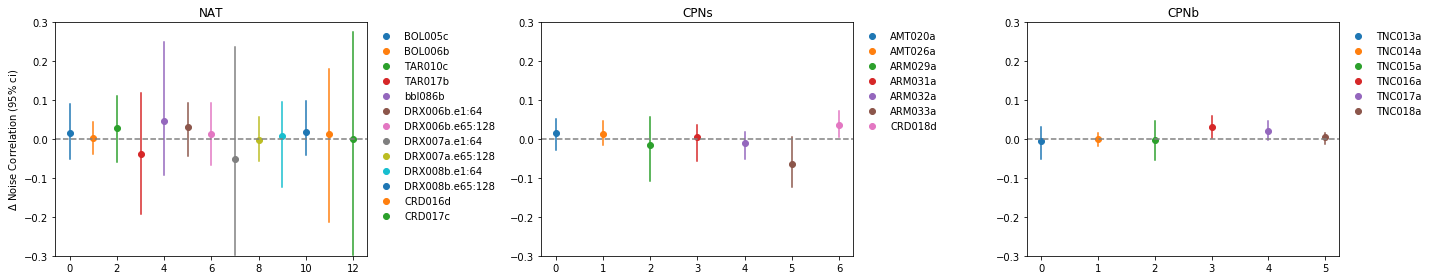

In [7]:
f, ax = plt.subplots(1, 3, figsize=(20, 4))

for i, (sites, dataset) in enumerate(zip([nat_data, cpns_data, cpnb_data], ['NAT', 'CPNs', 'CPNb'])):
    for j, s in enumerate(sites):
        d = rsc[rsc.site==s]
        delta = d.groupby(by='stim').mean()['delta']
        delta = delta[~np.isnan(delta)]
        ax[i].plot(j, delta.mean(), 'o', label=s)
        ax[i].plot([j, j], [np.quantile(delta, 0.025), np.quantile(delta, 0.975)], color=ax[i].get_lines()[-1].get_color())
    
    ax[i].legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
    ax[i].set_ylim((-.3, .3))
    ax[i].axhline(0.0, linestyle='--', color='grey')
    ax[i].set_title(dataset)
    ax[0].set_ylabel(r"$\Delta$ Noise Correlation (95% ci)")

f.tight_layout()

In [6]:
# COMPARE LV MODEL DECODING RESULTS W/ RAW RESULTS
decoder = 'dprime_jk10_zscore_allPup_fixtdr2-fa'
rlv = 'psth.fs4.pup-ld-st.pup0.pvp-epcpn-hrc-psthfr.z-plgsm.er3-aev_stategain.SxR-spred-lvnorm.2xR.so-inoise.2xR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3'
ind = 'psth.fs4.pup-ld-st.pup0.pvp-epcpn-hrc-psthfr.z-plgsm.er3-aev_stategain.SxR-spred-lvnorm.2xR.so-inoise.SxR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3'
plv = 'psth.fs4.pup-ld-st.pup.pvp0-epcpn-hrc-psthfr.z-plgsm.er3-aev_stategain.SxR-spred-lvnorm.SxR.so-inoise.2xR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3'
recache = False
results = {}
for i, (dataset, batch, sites) in enumerate(zip(['NAT'], [322], [nat_data])):
    if batch != 331:
        _rlv = rlv.replace('-epcpn', '')
        _ind = ind.replace('-epcpn', '')
        _plv = plv.replace('-epcpn', '')

    results[dataset] = {
        'fit': {
            'pup_indep': [],
            'indep_noise': [],
            'lv': [],
            'raw': []
        },
        'val': {
            'pup_indep': [],
            'indep_noise': [],
            'lv': [],
            'raw': []
        }
    }
    for j, site in enumerate(sites):
        if site in ['BOL005c', 'BOL006b']:
            _batch = 294
        else:
            _batch = batch
        loader = decoding.DecodingResults()
        fn = os.path.join(DPRIME_DIR, str(_batch), site, decoder+'_TDR.pickle')
        raw = loader.load_results(fn, cache_path=None, recache=recache)
        fn = os.path.join(DPRIME_DIR, str(_batch), site, decoder+f'_model-LV-{_rlv}_TDR.pickle')
        lv0 = loader.load_results(fn, cache_path=None, recache=recache)
        fn = os.path.join(DPRIME_DIR, str(_batch), site, decoder+f'_model-LV-{_ind}_TDR.pickle')
        indep = loader.load_results(fn, cache_path=None, recache=recache)
        fn = os.path.join(DPRIME_DIR, str(_batch), site, decoder+f'_model-LV-{_plv}_TDR.pickle')
        lv = loader.load_results(fn, cache_path=None, recache=recache)

        # get the epochs of interest (fit epochs)
        mask_bins = lv.meta['mask_bins']
        fit_combos = [k for k, v in lv.mapping.items() if (('_'.join(v[0].split('_')[:-1]), int(v[0].split('_')[-1])) in mask_bins) & \
                                                            (('_'.join(v[1].split('_')[:-1]), int(v[1].split('_')[-1])) in mask_bins)]
        all_combos = lv.evoked_stimulus_pairs
        val_combos = [c for c in all_combos if c not in fit_combos]

        for k, res in zip(['pup_indep', 'indep_noise', 'lv', 'raw'], [lv0, indep, lv, raw]):
            df = res.numeric_results
            df['delta'] = (df['bp_dp'] - df['sp_dp']) / (df['bp_dp'] + df['sp_dp']) #(raw.numeric_results['bp_dp'] + raw.numeric_results['sp_dp'])
            df['site'] = site
            results[dataset]['fit'][k].append(df.loc[fit_combos])
            results[dataset]['val'][k].append(df.loc[val_combos])

    # concatenate data frames
    for k in results[dataset]['fit'].keys():
        results[dataset]['fit'][k] = pd.concat(results[dataset]['fit'][k])
        results[dataset]['val'][k] = pd.concat(results[dataset]['val'][k])



[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_model-LV-psth.fs4.pup-ld-st.pup0.pvp-hrc-psthfr.z-plgsm.er3-aev_stategain.SxR-spred-lvnorm.2xR.so-inoise.2xR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_model-LV-psth.fs4.pup-ld-st.pup0.pvp-hrc-psthfr.z-plgsm.er3-aev_stategain.SxR-spred-lvnorm.2xR.so-inoise.SxR_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.t5.f0.ss3_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/294/BOL005c/dprime_jk10_zscore_allPup_fixtdr2-fa_model-LV-psth.fs4.pup-ld-st.pup.pvp0-hrc-psthfr.z-plgsm.er3-aev_stategain.S

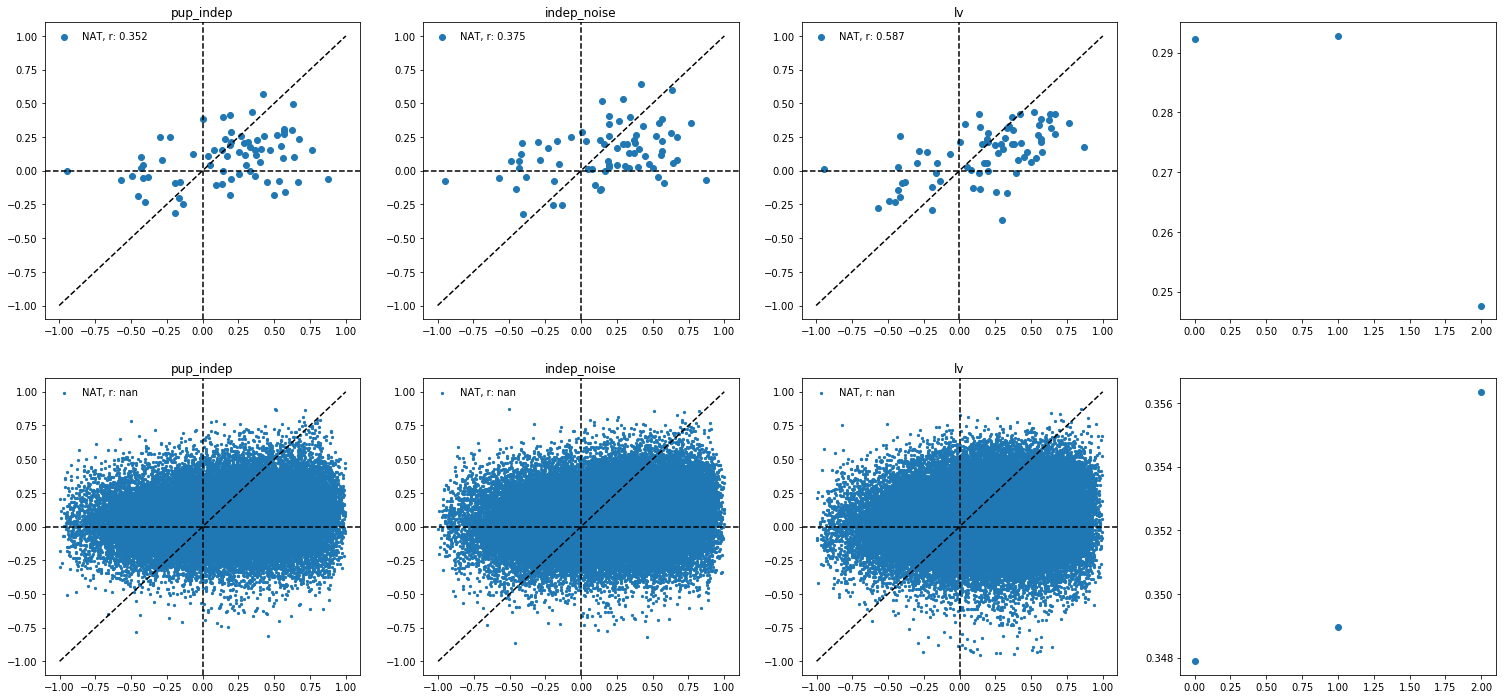

In [26]:
# PLOT FIT/VAL RESULTS COMPARISONS
metric = 'delta'
f, ax = plt.subplots(2, 4, figsize=(26, 12))

for j, (col, dataset) in enumerate(zip(['tab:blue', 'tab:orange'], results.keys())):
    for i, mn in enumerate(results[dataset]['fit'].keys()):
        if mn!='raw':
            x = results[dataset]['fit']['raw'][metric]
            y = results[dataset]['fit'][mn][metric]
            lab = f"{dataset}, r: {round(np.corrcoef(x, y)[0, 1], 3)}"
            ax[0, i].scatter(x, y, label=lab, color=col)
            ax[0, i].set_title(mn)
            if j == 0:
                ax[0, i].plot([-1, 1], [-1, 1], 'k--')
                ax[0, i].axhline(0, linestyle='--', color='k'); ax[0, i].axvline(0, linestyle='--', color='k') 
            if j == 0:
                ax[0, i].legend(frameon=False, fontsize=10) 

            ax[0, 3].plot(i, np.abs(x-y).mean(), 'o', color=col)

            x = results[dataset]['val']['raw'][metric]
            y = results[dataset]['val'][mn][metric]
            lab = f"{dataset}, r: {round(np.corrcoef(x, y)[0, 1], 3)}"
            ax[1, i].scatter(x, y, label=lab, s=5, color=col)
            ax[1, i].set_title(mn)
            if j == 0:
                ax[1, i].plot([-1, 1], [-1, 1], 'k--')
                ax[1, i].axhline(0, linestyle='--', color='k'); ax[1, i].axvline(0, linestyle='--', color='k') 
            if j == 0:
                ax[1, i].legend(frameon=False, fontsize=10) 

            ax[1, 3].plot(i, np.abs(x-y).mean(), 'o', color=col)
    